## Import necessary libraries

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

## Load the dataset from a CSV file

In [2]:
data=sns.load_dataset("iris")

## Explore the dataset with EDA

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualize the dataset

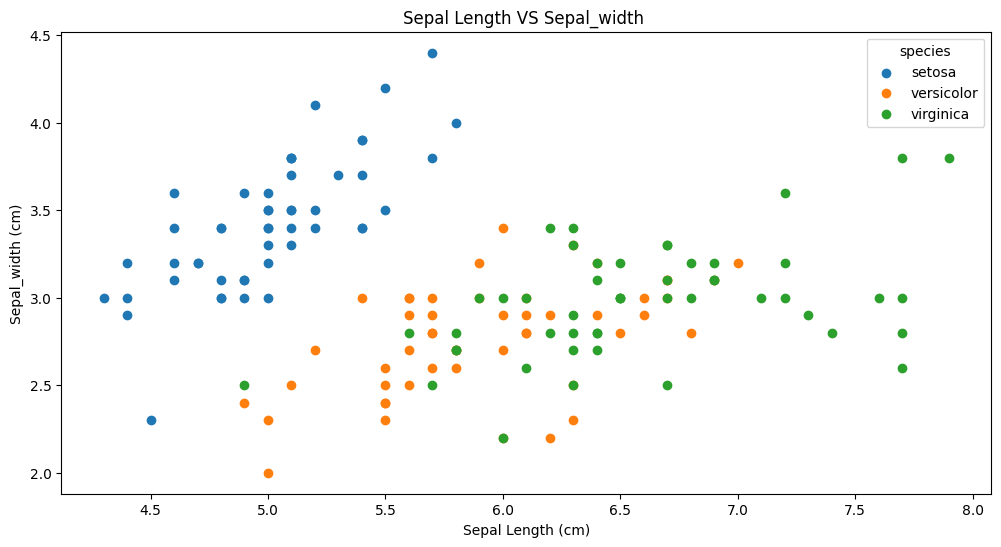

In [6]:

# scatter plot of the feature colored by class


plt.figure(figsize=(12,6))
for species ,species_data in data.groupby("species"):
    plt.scatter(species_data['sepal_length'],species_data['sepal_width'], label=species)
plt.xlabel("Sepal Length (cm)") 
plt.ylabel("Sepal_width (cm)")
plt.title("Sepal Length VS Sepal_width ")
plt.legend(title='species')
plt.show()   

## Data Preprocessing

In [7]:
# split the data into feature and target 


X= data.drop("species",axis=1)
y= data["species"]

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
# split the dataset into training and testing sets

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.4, random_state= 78)

In [11]:
X_train.shape 


(90, 4)

In [12]:
X_test.shape 

(60, 4)

In [13]:
y_train.shape

(90,)

In [14]:
y_test.shape

(60,)

## Decision Tree Classifier

In [15]:
# Create a decision tree classifier

clf=DecisionTreeClassifier()

In [16]:
# train the decision tree model

clf.fit(X_train, y_train)    

DecisionTreeClassifier()

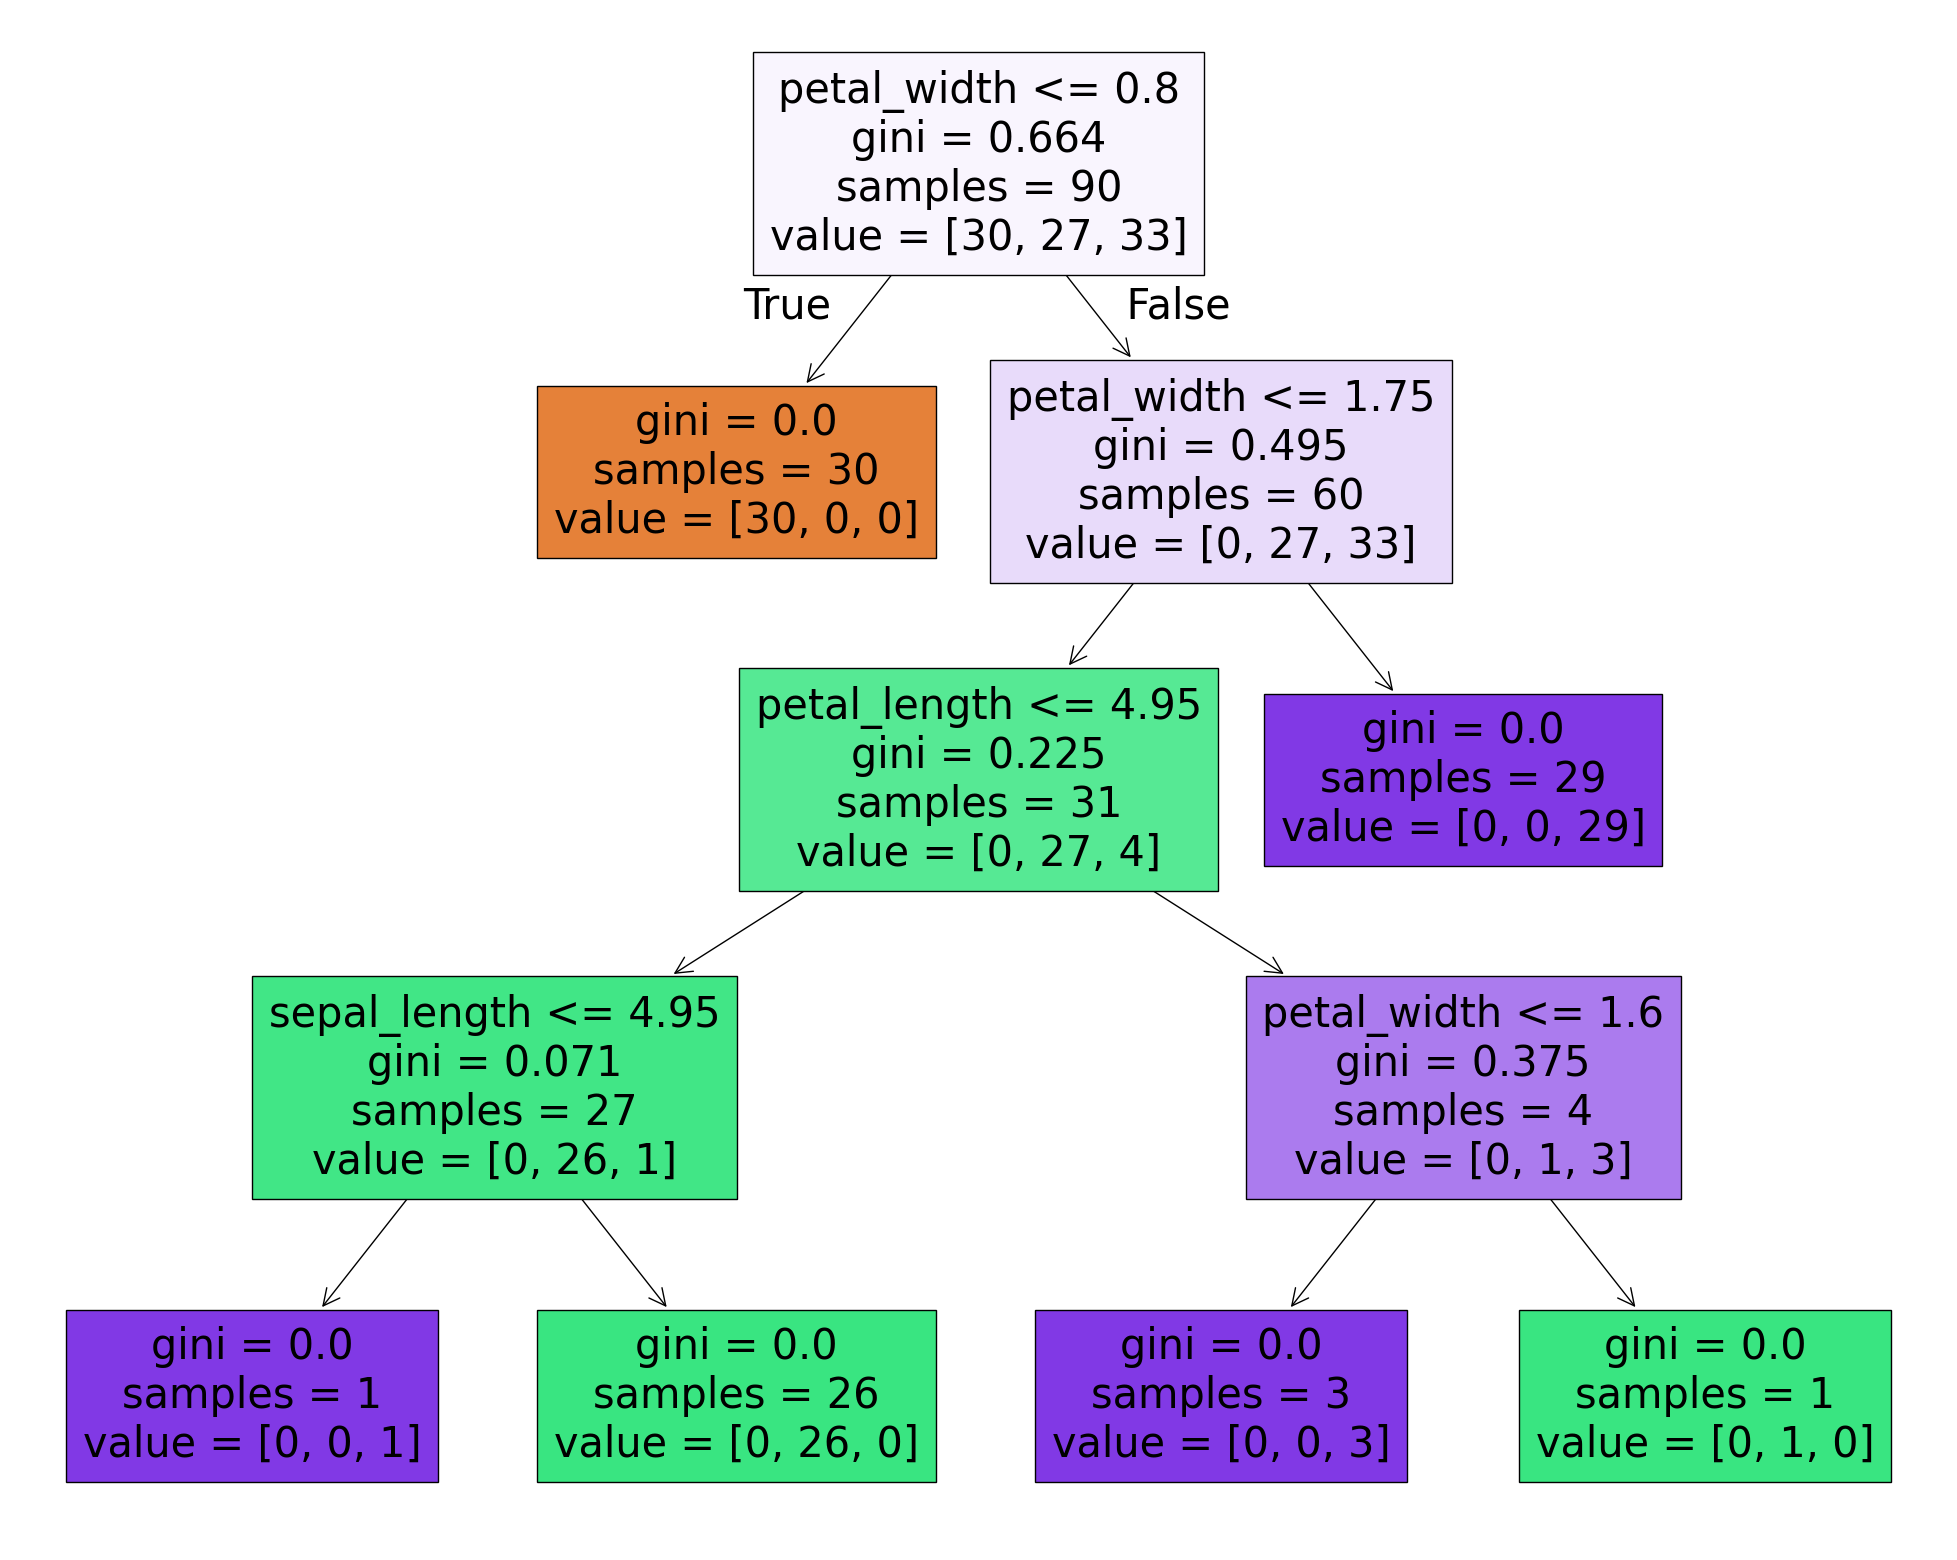

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   
                   filled=True)

In [17]:
# visualize the decision tree

dot_data= export_graphviz(
    clf,
    out_file=None,
    feature_names= X.columns,
    class_names= y.unique(),
    filled=True,
    rounded=True,
    special_characters=True    

)


graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_decision_tree.png")
   

InvocationException: Program terminated with status: 3221225595. stderr follows: []

In [ ]:
# make prediction on the testing data
y_pred=clf.predict(X_test)

In [ ]:
y_pred

array(['virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa'], dtype=object)

In [ ]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [ ]:
# genrate classification report

class_repo= classification_report(y_test,y_pred)

print("Classification Report")
print(class_repo)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.91      0.93        23
   virginica       0.89      0.94      0.91        17

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [20]:
# Show the decision tree visualization (can be found in the current directory)
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("iris_decision_tree.png"))
plt.axis('off')
plt.show()

SyntaxError: not a PNG file (<string>)

<Figure size 1200x800 with 0 Axes>

# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the single Decision Tree model

In [ ]:
# import necessary libraries

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# creat and train random forest classifier 

rf_clf=RandomForestClassifier(n_estimators=145,random_state=65)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=145, random_state=65)

In [ ]:
# make prediction using random forest 

rf_y_pred=rf_clf.predict(X_test)

In [ ]:
rf_y_pred

array(['virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa'], dtype=object)

In [ ]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [ ]:
rf_repo=classification_report(y_test,rf_y_pred)


print("Classification Report")
print(rf_repo)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.91      0.95        23
   virginica       0.89      1.00      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
# create and train a gradient boosting classifier

gb_clf= GradientBoostingClassifier(n_estimators=100, random_state=75)
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=75)

In [ ]:
gb_y_pred=gb_clf.predict(X_test)

In [ ]:
# Evaluate Gradient Boosting model
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [ ]:
gb_class_repo= classification_report(y_test,gb_y_pred)

print("classification Report")
print(gb_class_repo)

classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.91      0.95        23
   virginica       0.89      1.00      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
# compare results with singal decision tree

print("COMPARE WITH SIGNAL DECISION TREE")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")



COMPARE WITH SIGNAL DECISION TREE
Decision Tree Accuracy: 0.97
Random Forest Accuracy: 0.97
Gradient Boosting Accuracy: 0.97


# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the two Decision Tree model

In [ ]:
# create and train two seprate decision tree classifiers
tree1= DecisionTreeClassifier(random_state=47)
tree1.fit(X_train,y_train)

tree2= DecisionTreeClassifier(random_state=47,max_depth=3)
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=47)

In [ ]:
# make prediction using two decision tree

tree1_y_pred= tree1.predict(X_test)
tree2_y_pred= tree2.predict(X_test)


In [ ]:
# Evaluate the first decision tree
tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [ ]:
# Evaluate the second decision tree
tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [ ]:
# Print evaluation metrics for the two decision trees
print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")

print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Decision Tree 2 Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [ ]:
# Compare the results of all models
print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison of Models:
Decision Tree 1 Accuracy: 0.97
Decision Tree 2 Accuracy: 0.97
Random Forest Accuracy: 0.97
Gradient Boosting Accuracy: 0.97
